# More on Poisson Regression, and GLMs

In the last lecture, we fit the Poisson regression model to the Mroz dataset which has data on a bunch of economic variables for married women in the year 1975. 

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [3]:
#Import the MROZ.csv dataset
mroz = pd.read_csv("MROZ.csv")
mroz.head(12)

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499981,0.328512,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,0.092123,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100058,1.524272,49
5,1,2032,0,0,54,12,4.7421,4.70,1040,57,...,19495,0.6915,14,7,7.5,1,33,9.859054,1.556480,1089
6,1,1440,0,2,37,16,8.3333,5.95,2670,37,...,21152,0.6915,14,7,5.0,0,11,9.152048,2.120260,121
7,1,1020,0,0,54,12,7.8431,9.98,4120,53,...,18900,0.6915,3,3,5.0,0,35,10.900038,2.059634,1225
8,1,1458,0,2,48,12,2.1262,0.00,1995,52,...,20405,0.7515,7,7,3.0,0,24,17.305000,0.754336,576
9,1,1600,0,2,39,12,4.6875,4.15,2100,43,...,20425,0.6915,7,7,5.0,0,21,12.925000,1.544899,441


Specifically, we fit the following model for the response "hours" in terms of the covariates "kidslt6", "age", "educ", "huswage", "exper" and "expersq".

In [5]:
#Poisson Regression through StatsModels
# Define the response variable and covariates
Y = mroz['hours']
X = mroz[['kidslt6', 'age', 'educ', 
        'huswage', 'exper', 'expersq']].copy()
X = sm.add_constant(X) # Add a constant (intercept) to the model
# Fit the Poisson regression model
poiregmodel = sm.GLM(Y, X, family=sm.families.Poisson()).fit()
print(poiregmodel.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  hours   No. Observations:                  753
Model:                            GLM   Df Residuals:                      746
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.1563e+05
Date:                Tue, 03 Oct 2023   Deviance:                   6.2754e+05
Time:                        22:00:04   Pearson chi2:                 6.60e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9365      0.012    562.281      0.0

We have seen in the last class that "kidslt6" is an important variable and its coefficient -0.8075 for the "kidslt6" variable gives the following interpretation: having a small kid reduces mean hours worked by 55%. Suppose we replace this variable by "kidsge6" and refit the model. Will this give us a worse model? How do we check that the model indeed gets worse?

In [6]:
#56% comes from:
print((np.exp(poiregmodel.params['kidslt6']) - 1)*100)

-55.40391074218227


In [7]:
Y = mroz['hours']
X1 = mroz[['kidsge6', 'age', 'educ', 
        'huswage', 'exper', 'expersq']].copy() #'kidslt6' is now dropped
X1 = sm.add_constant(X1) 
poiregmodel1 = sm.GLM(Y, X1, family=sm.families.Poisson()).fit()
print(poiregmodel1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  hours   No. Observations:                  753
Model:                            GLM   Df Residuals:                      746
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.4027e+05
Date:                Tue, 03 Oct 2023   Deviance:                   6.7681e+05
Time:                        22:00:08   Pearson chi2:                 6.78e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2418      0.013    485.960      0.0

Check that the log-likelihood for the model with 'kidslt6' is higher than that of 'kidsge6'. Also the Deviance for the former model is smaller than the latter model. 

In [8]:
# Log-Likelihood
logLik_model = poiregmodel.llf
logLik_model1 = poiregmodel1.llf

# Deviance
deviance_model = poiregmodel.deviance
deviance_model1 = poiregmodel1.deviance

# Print results
print(f"Model with 'kidslt6': Log-Likelihood = {logLik_model}, Deviance = {deviance_model}")
print(f"Model with 'kidsge6': Log-Likelihood = {logLik_model1}, Deviance = {deviance_model1}")

Model with 'kidslt6': Log-Likelihood = -315632.12091262755, Deviance = 627538.4070785991
Model with 'kidsge6': Log-Likelihood = -340265.97607505764, Deviance = 676806.1174034592


In [9]:
Y = mroz['hours']
X_no_kids = mroz[['age', 'educ', 
        'huswage', 'exper', 'expersq']].copy() #'kidslt6' is now dropped
X_no_kids = sm.add_constant(X_no_kids) 
poiregmodel_no_kids = sm.GLM(Y, X_no_kids, family=sm.families.Poisson()).fit()
print(poiregmodel_no_kids.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  hours   No. Observations:                  753
Model:                            GLM   Df Residuals:                      747
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.4029e+05
Date:                Tue, 03 Oct 2023   Deviance:                   6.7686e+05
Time:                        22:00:24   Pearson chi2:                 6.79e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2080      0.012    517.391      0.0

Some measures that are used for comparing models are: 

1. Log-Likelihood: higher the better (but models with more parameters always have higher log-likelihoods)
2. Deviance: lower the better (but models with more parameters always have lower deviance)
3. Akaike Information Criterion (AIC): lower the better
4. Bayesian Information Criterion (BIC): lower the better

In [10]:
# Log-Likelihood
logLik_model = poiregmodel.llf
logLik_model_no_kids = poiregmodel_no_kids.llf

# Deviance
deviance_model = poiregmodel.deviance
deviance_model_no_kids = poiregmodel_no_kids.deviance

# Print results
print(f"Model with 'kidslt6': Log-Likelihood = {logLik_model}, Deviance = {deviance_model}")
print(f"Model without 'kidslt6': Log-Likelihood = {logLik_model_no_kids}, Deviance = {deviance_model_no_kids}")

Model with 'kidslt6': Log-Likelihood = -315632.12091262755, Deviance = 627538.4070785991
Model without 'kidslt6': Log-Likelihood = -340293.05791103386, Deviance = 676860.2810754117


In [11]:
print("AIC with 'kidslt6': ", poiregmodel.aic)
print("AIC without 'kidslt6': ", poiregmodel_no_kids.aic)
print("BIC with 'kidslt6': ", poiregmodel.bic_llf)
print("BIC without 'kidslt6': ", poiregmodel_no_kids.bic_llf)

AIC with 'kidslt6':  631278.2418252551
AIC without 'kidslt6':  680598.1158220677
BIC with 'kidslt6':  631310.6102818497
BIC without 'kidslt6':  680625.8602134346


Clearly, the AIC and BIC are much smaller for the model with the 'kidslt6' variable. 

In [12]:
Y = mroz['hours']
Xfull = mroz[['kidslt6', 'kidsge6', 'age', 'educ', 'hushrs', 'huseduc', 'huswage', 
           'motheduc', 'fatheduc', 'exper', 'expersq', 'unem', 'city']]
X_one = mroz[['kidslt6']] #'kidslt6' is now dropped
X_one = sm.add_constant(X_one) 
poiregmodel_one = sm.GLM(Y, X_one, family=sm.families.Poisson()).fit()
print(poiregmodel_one.summary())

X_two = mroz[['kidslt6', 'fatheduc', 'motheduc', 'huseduc', 'unem', 'city', 'hushrs', 'kidsge6']]
X_two = sm.add_constant(X_two) 
poiregmodel_two = sm.GLM(Y, X_two, family=sm.families.Poisson()).fit()
print(poiregmodel_two.summary())

display([poiregmodel_one.aic, poiregmodel_two.aic])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  hours   No. Observations:                  753
Model:                            GLM   Df Residuals:                      751
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.0312e+05
Date:                Tue, 03 Oct 2023   Deviance:                   8.0251e+05
Time:                        22:00:34   Pearson chi2:                 7.77e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7286      0.001   4807.711      0.0

[806236.5194121726, 790213.1968248647]

In [13]:
Y = mroz['hours']
Xfull = mroz[['kidslt6', 'kidsge6', 'age', 'educ', 'hushrs', 'huseduc', 'huswage', 
           'motheduc', 'fatheduc', 'exper', 'expersq', 'unem', 'city']]
Xfull = sm.add_constant(Xfull) 
poiregmodel_full = sm.GLM(Y, Xfull, family=sm.families.Poisson()).fit()
print(poiregmodel_full.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  hours   No. Observations:                  753
Model:                            GLM   Df Residuals:                      739
Model Family:                 Poisson   Df Model:                           13
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.1222e+05
Date:                Tue, 03 Oct 2023   Deviance:                   6.2072e+05
Time:                        22:00:37   Pearson chi2:                 6.53e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4625      0.015    503.407      0.0

In [14]:
#Best Subsets Poisson Regression:
def get_combinations(arr, k):
    if k == 0:
        return [[]]
    if arr.empty: 
        return []
    return get_combinations(arr[1:], k) + [x + [arr[0]] for x in get_combinations(arr[1:], k-1)]
#The above function returns a list of all possible 'k'-sized combinations from 'arr'. 
#print(get_combinations(['a', 'b', 'c', 'd', 'e'], 3))

Y = mroz['hours']
Xfull = mroz[['kidslt6', 'kidsge6', 'age', 'educ', 'hushrs', 'huseduc', 'huswage', 
           'motheduc', 'fatheduc', 'exper', 'expersq', 'unem', 'city']]

#import statsmodels.genmod.generalized_linear_model as glm
#glm.SET_USE_BIC_LLF(True)

best_aic_per_k = {}

# Looping through all possible sizes of predictor subsets
for k in range(1, len(Xfull.columns) + 1):
    
    # Getting all combinations of predictors of size k without using itertools
    best_aic_k = float("inf")
    best_model_k = None
    best_variables_k = None
    
    for variables in get_combinations(Xfull.columns, k):
        predictors = Xfull[list(variables)]
        predictors = sm.add_constant(predictors)  # Add a constant (intercept) to the model
        
        # Fitting the model
        model = sm.GLM(Y, predictors, family=sm.families.Poisson()).fit()
        
        # Updating best AIC model for each k
        if model.aic < best_aic_k:
            best_aic_k = model.aic
            best_model_k = model
            best_variables_k = variables  # Storing variable names
    
    # Storing the best AIC and variable names for each k in the dictionary
    best_aic_per_k[k] = (best_aic_k, best_model_k, best_variables_k)

# Displaying the results
for k, (aic, model, variables) in best_aic_per_k.items():
    print(f"\nBest AIC value for k={k} variables: {aic}")
    print(f"Variables in the model: {variables}")
    print(f"Model parameters:\n{model.params}")


Best AIC value for k=1 variables: 744498.6174901996
Variables in the model: ['exper']
Model parameters:
const    5.997464
exper    0.049036
dtype: float64

Best AIC value for k=2 variables: 708125.6250492265
Variables in the model: ['exper', 'age']
Model parameters:
const    7.340090
exper    0.066197
age     -0.036907
dtype: float64

Best AIC value for k=3 variables: 653555.3560647196
Variables in the model: ['exper', 'age', 'kidslt6']
Model parameters:
const      8.134844
exper      0.064158
age       -0.051846
kidslt6   -0.846538
dtype: float64

Best AIC value for k=4 variables: 639269.8868831303
Variables in the model: ['expersq', 'exper', 'age', 'kidslt6']
Model parameters:
const      7.513553
expersq   -0.001812
exper      0.122583
age       -0.045117
kidslt6   -0.793601
dtype: float64

Best AIC value for k=5 variables: 634410.2632771938
Variables in the model: ['expersq', 'exper', 'educ', 'age', 'kidslt6']
Model parameters:
const      6.970329
expersq   -0.001774
exper      0.1

In [15]:
import statsmodels.genmod.generalized_linear_model as glm
glm.SET_USE_BIC_LLF(True) #this silences the warnings for BIC

#Best BIC Model:
best_bic_per_k = {}

# Looping through all possible sizes of predictor subsets
for k in range(1, len(Xfull.columns) + 1):
    
    best_bic_k = float("inf")
    best_model_k = None
    best_variables_k = None
    
    for variables in get_combinations(Xfull.columns, k):
        predictors = Xfull[list(variables)]
        predictors = sm.add_constant(predictors)  # Add a constant (intercept) to the model
        
        # Fitting the model
        model = sm.GLM(Y, predictors, family=sm.families.Poisson()).fit()
        
        # Updating best BIC model for each k
        if model.bic < best_bic_k:  # Using BIC instead of AIC here
            best_bic_k = model.bic  # Updating BIC value
            best_model_k = model
            best_variables_k = variables  # Storing variable names
    
    # Storing the best BIC and variable names for each k in the dictionary
    best_bic_per_k[k] = (best_bic_k, best_model_k, best_variables_k)

# Displaying the results
for k, (bic, model, variables) in best_bic_per_k.items():
    print(f"\nBest BIC value for k={k} variables: {bic}")
    print(f"Variables in the model: {variables}")
    print(f"Model parameters:\n{model.params}")


Best BIC value for k=1 variables: 744507.8656206552
Variables in the model: ['exper']
Model parameters:
const    5.997464
exper    0.049036
dtype: float64

Best BIC value for k=2 variables: 708139.4972449099
Variables in the model: ['exper', 'age']
Model parameters:
const    7.340090
exper    0.066197
age     -0.036907
dtype: float64

Best BIC value for k=3 variables: 653573.8523256308
Variables in the model: ['exper', 'age', 'kidslt6']
Model parameters:
const      8.134844
exper      0.064158
age       -0.051846
kidslt6   -0.846538
dtype: float64

Best BIC value for k=4 variables: 639293.0072092693
Variables in the model: ['expersq', 'exper', 'age', 'kidslt6']
Model parameters:
const      7.513553
expersq   -0.001812
exper      0.122583
age       -0.045117
kidslt6   -0.793601
dtype: float64

Best BIC value for k=5 variables: 634438.0076685606
Variables in the model: ['expersq', 'exper', 'educ', 'age', 'kidslt6']
Model parameters:
const      6.970329
expersq   -0.001774
exper      0.1

In [16]:
mroz.shape

(753, 22)

In [17]:
#Plotting the fitted values against the response: 
Y = mroz['hours']
X = mroz[['kidslt6', 'age', 'educ', 
        'huswage', 'exper', 'expersq']].copy()
X = sm.add_constant(X) # Add a constant (intercept) to the model
# Fit the Poisson regression model
poiregmodel = sm.GLM(Y, X, family=sm.families.Poisson()).fit()
print(poiregmodel.summary())
print(dir(poiregmodel))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  hours   No. Observations:                  753
Model:                            GLM   Df Residuals:                      746
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.1563e+05
Date:                Tue, 03 Oct 2023   Deviance:                   6.2754e+05
Time:                        22:02:38   Pearson chi2:                 6.60e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9365      0.012    562.281      0.0

0      765.488164
1      789.438938
2      727.125304
3      814.320429
4      442.021498
          ...    
748    533.872877
749    350.154433
750    475.726717
751    466.893617
752    900.034415
Length: 753, dtype: float64


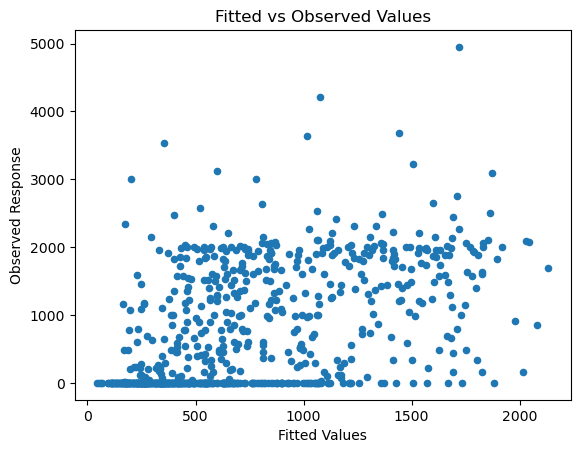

In [18]:
import matplotlib.pyplot as plt
poireg_fitted_values = poiregmodel.fittedvalues
print(poireg_fitted_values)
plt.scatter(poireg_fitted_values, Y, alpha = 1, s = 20)
plt.xlabel('Fitted Values')
plt.ylabel('Observed Response')
plt.title('Fitted vs Observed Values')
plt.show()

In [19]:
#Let us find observations where Y = 0 and fitted values > 1500:
#condition = (Y > 3500) & (poireg_fitted_values > 1000)
#condition = (Y > 3500)
#condition = (Y == 0) & (poireg_fitted_values < 115)
condition = (poireg_fitted_values > 2000)
print(mroz.loc[condition, ['hours', 'kidslt6', 'age', 'educ', 'huswage', 'exper', 'expersq']])
print(poireg_fitted_values[condition])
print(poiregmodel.params)
print(np.max(poireg_fitted_values))

     hours  kidslt6  age  educ  huswage  exper  expersq
34    2081        0   45    16   7.5449     27      729
157   2090        0   43    16   9.5480     25      625
162    160        0   34    14  11.6850     19      361
279    846        0   43    14   3.2788     25      625
299   1688        0   32    17   9.5545     15      225
34     2042.464692
157    2028.810563
162    2018.081739
279    2078.500942
299    2132.558296
dtype: float64
const      6.936480
kidslt6   -0.807524
age       -0.042680
educ       0.052831
huswage   -0.020714
exper      0.120372
expersq   -0.001829
dtype: float64
2132.55829618613


In [20]:
#Smallest fitted values
indices_of_smallest = np.argsort(poireg_fitted_values)[:10]
print(poireg_fitted_values[indices_of_smallest])

483     45.581963
604     52.946998
530     60.616688
714     66.299551
620     93.241069
688     93.947389
640    102.860105
585    109.168608
561    111.126577
676    112.279641
dtype: float64


In [21]:
coef = poiregmodel.params.values
row = 483
print(mroz.loc[row, ['hours', 'kidslt6', 'age', 'educ', 'huswage', 'exper', 'expersq']])
print(poiregmodel.params)
lincom = coef[0] + coef[1]*mroz.loc[row, 'kidslt6'] + coef[2]*mroz.loc[row, 'age'] + coef[3]*mroz.loc[row, 'educ'] + coef[4]*mroz.loc[row, 'huswage'] + coef[5]*mroz.loc[row, 'exper'] + coef[6]*mroz.loc[row, 'expersq']
display([lincom, np.exp(lincom)])

hours       0.000
kidslt6     3.000
age        31.000
educ       13.000
huswage    19.444
exper       3.000
expersq     9.000
Name: 483, dtype: float64
const      6.936480
kidslt6   -0.807524
age       -0.042680
educ       0.052831
huswage   -0.020714
exper      0.120372
expersq   -0.001829
dtype: float64


[3.8195120956547557, 45.58196325662061]

In [22]:
row = 483
display(coef[0], coef[1]*mroz.loc[row, 'kidslt6'], coef[2]*mroz.loc[row, 'age'], coef[3]*mroz.loc[row, 'educ'], coef[4]*mroz.loc[row, 'huswage'], coef[5]*mroz.loc[row, 'exper'], coef[6]*mroz.loc[row, 'expersq'])


6.936479701777115

-2.422572046826709

-1.32309549021774

0.6867972840685818

-0.40275727163651026

0.36111672516817395

-0.01645680667815629

In [23]:
display(np.min(poireg_fitted_values), np.max(poireg_fitted_values))
display(np.min(Y), np.max(Y))

45.58196325662061

2132.55829618613

0

4950

In [24]:
#Posterior Predictive Distributions:
#First obtain posterior samples:
cov_matrix = poiregmodel.cov_params()
print(cov_matrix)
print(np.column_stack((np.sqrt(np.diag(cov_matrix)), poiregmodel.bse)))
#Manual computation of covariance matrix:
beta_hat = poiregmodel.params.values 
log_muvec = np.dot(X, beta_hat)
muvec = np.exp(log_muvec)
M = np.diag(muvec)
Hessian = -X.T @ M @ X
Hessian_inv = np.linalg.inv(Hessian)
CovMat = -Hessian_inv
print(CovMat) #this coincides with poiregmodel.cov_params()

                const       kidslt6           age          educ       huswage  \
const    1.521851e-04 -1.094065e-05 -1.890439e-06 -4.802901e-06  1.794310e-07   
kidslt6 -1.094065e-05  1.746699e-05  2.218647e-07 -1.421124e-07 -2.502671e-08   
age     -1.890439e-06  2.218647e-07  4.501405e-08  1.130163e-08 -1.009965e-08   
educ    -4.802901e-06 -1.421124e-07  1.130163e-08  4.008993e-07 -7.051506e-08   
huswage  1.794310e-07 -2.502671e-08 -1.009965e-08 -7.051506e-08  1.441951e-07   
exper   -2.275008e-06  2.447391e-07  9.708493e-09 -1.707776e-08  2.029966e-09   
expersq  8.169060e-08 -6.410297e-09 -8.849655e-10  1.469846e-10  3.559604e-10   

                exper       expersq  
const   -2.275008e-06  8.169060e-08  
kidslt6  2.447391e-07 -6.410297e-09  
age      9.708493e-09 -8.849655e-10  
educ    -1.707776e-08  1.469846e-10  
huswage  2.029966e-09  3.559604e-10  
exper    3.014745e-07 -8.400485e-09  
expersq -8.400485e-09  2.661157e-10  
[[1.23363311e-02 1.23363311e-02]
 [4.17935286e-

In [25]:
#Generating posterior beta samples:
n_samples = 1000
beta_samples = np.random.multivariate_normal(beta_hat, cov_matrix, n_samples)
print(beta_samples.shape)
print(beta_samples[:10])

(1000, 7)
[[ 6.93952684e+00 -8.04945607e-01 -4.28347447e-02  5.26973193e-02
  -2.09351084e-02  1.20815221e-01 -1.83721826e-03]
 [ 6.92196936e+00 -8.22301423e-01 -4.27467573e-02  5.42247998e-02
  -2.02284436e-02  1.20043807e-01 -1.82058706e-03]
 [ 6.93616036e+00 -8.02914740e-01 -4.24837881e-02  5.17888914e-02
  -2.03845306e-02  1.20729540e-01 -1.83456066e-03]
 [ 6.92812731e+00 -8.06191201e-01 -4.25954164e-02  5.32618862e-02
  -2.12364615e-02  1.20712394e-01 -1.83733173e-03]
 [ 6.94466164e+00 -8.09257775e-01 -4.27106642e-02  5.19942333e-02
  -1.99827873e-02  1.20206557e-01 -1.82448973e-03]
 [ 6.94971167e+00 -8.04869661e-01 -4.27924913e-02  5.25917522e-02
  -2.04780022e-02  1.19359372e-01 -1.79987286e-03]
 [ 6.95580723e+00 -8.08911347e-01 -4.27200505e-02  5.16082153e-02
  -2.06567645e-02  1.20176157e-01 -1.82449542e-03]
 [ 6.93015227e+00 -8.05906129e-01 -4.27957125e-02  5.32181405e-02
  -2.06905069e-02  1.21308618e-01 -1.85043876e-03]
 [ 6.95116196e+00 -8.06428400e-01 -4.31040471e-02  5.2

In [26]:
#Generating posterior response values for fixed covariates:
row = 483
#row = 291
#row = 34
print(mroz.loc[row, ['hours', 'kidslt6', 'age', 'educ', 'huswage', 'exper', 'expersq']])
print(poireg_fitted_values[row])
poisson_pred_Y_row = np.zeros(n_samples)
for i in range(n_samples):
    poisson_mean = np.exp(np.dot(beta_samples[i], X.iloc[row]))
    poisson_pred_Y_row[i] = np.random.poisson(poisson_mean)
counts = pd.value_counts(poisson_pred_Y_row).sort_index()
print(counts)

hours       0.000
kidslt6     3.000
age        31.000
educ       13.000
huswage    19.444
exper       3.000
expersq     9.000
Name: 483, dtype: float64
45.58196325662061
26.0     2
28.0     4
29.0     2
30.0     1
31.0     5
32.0     3
33.0    11
34.0    15
35.0    27
36.0    19
37.0    38
38.0    32
39.0    39
40.0    54
41.0    49
42.0    48
43.0    52
44.0    50
45.0    47
46.0    53
47.0    70
48.0    49
49.0    44
50.0    39
51.0    58
52.0    28
53.0    33
54.0    30
55.0    13
56.0    15
57.0    18
58.0    16
59.0     6
60.0     7
61.0     3
62.0     9
63.0     4
64.0     3
65.0     3
66.0     1
Name: count, dtype: int64


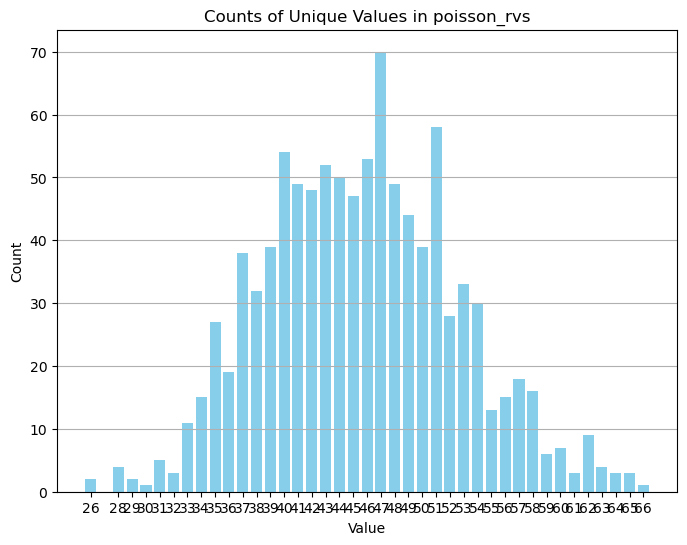

In [27]:
plt.figure(figsize = (8, 6))
plt.bar(counts.index, counts.values, color='skyblue')
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Counts of Unique Values in poisson_rvs')
plt.xticks(counts.index)
plt.grid(axis='y')
plt.show()

In [28]:
#Negative Binomial Regression
Y = mroz['hours']
X = mroz[['kidslt6', 'age', 'educ', 'huswage', 'exper', 'expersq']].copy()
X = sm.add_constant(X)  # Add a constant (intercept) to the model
# Fit the Negative Binomial regression model
#negbinom_model = sm.NegativeBinomial(Y, X).fit()
#negbinom_model = sm.GLM(Y, X, family=sm.families.NegativeBinomial()).fit()
#negbinom_model = sm.NegativeBinomial(Y, X).fit(start_params=None, method='newton', maxiter=35, full_output=True, disp=True, callback=None, alpha=7)
#negbinom_model = sm.NegativeBinomial(Y, X).fit()
negbinom_model = sm.GLM(Y, X, family=sm.families.NegativeBinomial(alpha=7)).fit()
# Display the summary
print(negbinom_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  hours   No. Observations:                  753
Model:                            GLM   Df Residuals:                      746
Model Family:        NegativeBinomial   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4321.2
Date:                Tue, 03 Oct 2023   Deviance:                       795.42
Time:                        22:02:39   Pearson chi2:                     307.
No. Iterations:                    11   Pseudo R-squ. (CS):            0.07652
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1470      0.860      8.307      0.0

In [29]:
print((np.exp(negbinom_model.params['kidslt6']) - 1)*100)

-64.46921135832466


In [30]:
#help(sm.NegativeBinomial)

In [31]:
negbinom_fitted_values = negbinom_model.fittedvalues
print(negbinom_fitted_values)
display(np.min(negbinom_fitted_values), np.max(negbinom_fitted_values))

0      795.122210
1      847.945955
2      741.291592
3      921.619947
4      395.226473
          ...    
748    510.480217
749    289.334497
750    481.349820
751    378.123822
752    950.682165
Length: 753, dtype: float64


19.915960870299376

2853.8150650368725

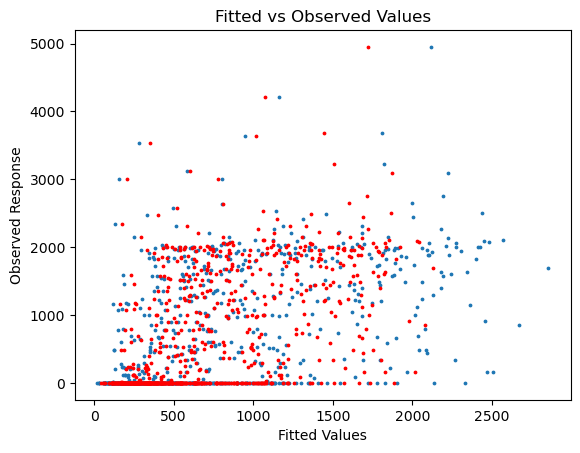

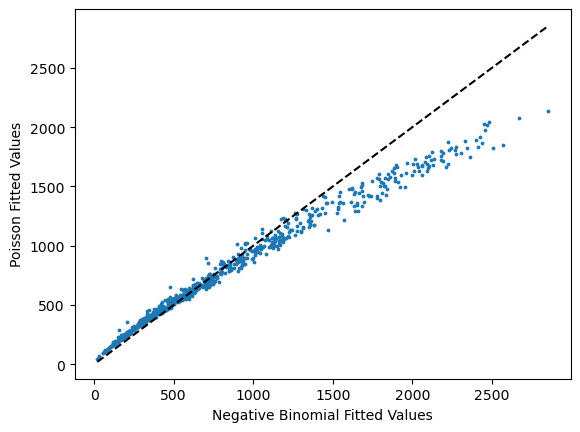

In [29]:
plt.scatter(negbinom_fitted_values, Y, alpha = 1, s = 3)
plt.scatter(poireg_fitted_values, Y, alpha = 1, s = 3, color = 'red')
plt.xlabel('Fitted Values')
plt.ylabel('Observed Response')
plt.title('Fitted vs Observed Values')
plt.show()
#The negative binomial fits show more dispersion
plt.scatter(negbinom_fitted_values, poireg_fitted_values, alpha = 1, s = 3)
plt.xlabel('Negative Binomial Fitted Values')
plt.ylabel('Poisson Fitted Values')
x = np.linspace(min(negbinom_fitted_values), max(negbinom_fitted_values), 100)
plt.plot(x, x, label='y=x', linestyle='--', color='black')
plt.show()

In [30]:
condition = (Y == 0) & (negbinom_fitted_values < 115)
print(mroz.loc[condition, ['hours', 'kidslt6', 'age', 'educ', 'huswage', 'exper', 'expersq']])
print(np.column_stack((negbinom_fitted_values[condition], poireg_fitted_values[condition])))
print(negbinom_model.params)

     hours  kidslt6  age  educ  huswage  exper  expersq
442      0        1   36     9   7.6628      0        0
446      0        2   44    14   9.3750     10      100
482      0        2   33    13   7.9709      4       16
483      0        3   31    13  19.4440      3        9
486      0        0   55     8   6.9215      0        0
496      0        1   42    11   4.2308      0        0
513      0        0   53     7   1.4800      0        0
530      0        1   51     7  10.5000      0        0
552      0        2   30    12   8.8333      2        4
561      0        1   47     7   6.1204      3        9
579      0        2   36    10   7.1565      5       25
585      0        0   57     5   3.6184      0        0
592      0        0   52     8   8.1566      0        0
595      0        0   52     8  16.9070      0        0
604      0        3   37    13   5.0434      4       16
620      0        1   46    12  12.7660      0        0
628      0        0   56    11   9.2567      0  

In [31]:
#help(sm.families.NegativeBinomial)

In [32]:
#Posterior Normal Covariance
cov_matrix = negbinom_model.cov_params()
print(cov_matrix)
print(np.column_stack((np.sqrt(np.diag(cov_matrix)), negbinom_model.bse)))

            const   kidslt6       age      educ   huswage     exper   expersq
const    0.740299 -0.055950 -0.009554 -0.024580  0.001239 -0.006172  0.000264
kidslt6 -0.055950  0.042559  0.001176 -0.000616 -0.000136  0.000783 -0.000022
age     -0.009554  0.001176  0.000206  0.000080 -0.000044  0.000046 -0.000004
educ    -0.024580 -0.000616  0.000080  0.002050 -0.000330 -0.000189  0.000003
huswage  0.001239 -0.000136 -0.000044 -0.000330  0.000586  0.000003  0.000002
exper   -0.006172  0.000783  0.000046 -0.000189  0.000003  0.001220 -0.000037
expersq  0.000264 -0.000022 -0.000004  0.000003  0.000002 -0.000037  0.000001
[[0.86040628 0.86040628]
 [0.20629835 0.20629835]
 [0.0143565  0.0143565 ]
 [0.04528184 0.04528184]
 [0.02420905 0.02420905]
 [0.03493439 0.03493439]
 [0.00114664 0.00114664]]
